In [4]:
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

Задача 1.

In [5]:
df = pd.DataFrame([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]], columns=['1','2','3','4'])

In [6]:
y = [9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

In [7]:
model = LinearRegression()
r2_max = 0
for cols in combinations(df.columns, r=2):
    model.fit(df[list(cols)], y)
    y_pred = model.predict(df[list(cols)])
    r2 = r2_score(y, y_pred)
    if r2 > r2_max:
        r2_max = r2
        best_cols = cols
# Лучшие два признака для лин. регрессии
best_cols, r2_max

(('1', '3'), 0.7634246238793152)

Проверим значимость уравнения регрессии.

In [39]:
from scipy import stats

def FishCrit(r2, m, n, alpha=0.05):
    k1 = m
    k2 = n - m - 1
    t = stats.f.ppf(1 - alpha, k1, k2)
    F = (r2 / k1) / ((1 - r2) / k2)
    print(f'Крит. обл. - {t}, статистика - {F}')
    print('Уравнение регрессии признается '+('незначимым' if F < t else 'значимым'))        

In [40]:
FishCrit(r2_max, m=2, n=df.shape[0])

Крит. обл. - 4.73741412777588, статистика - 11.29443912292265
Уравнение регрессии признается значимым


Значение статистики попало в критическую область, уравнение регрессии признаётся значимым.

Задача 2.

In [21]:
import numpy as np
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [22]:
# Пункт 1
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b0 = np.mean(scoring) - b1 * np.mean(salary)
b0, b1

(444.1773573243596, 2.620538882402765)

In [36]:
salary1 = salary.reshape(-1, 1)
model.fit(salary1, scoring)
model.intercept_, model.coef_

(444.17735732435955, array([2.62053888]))

Значения коэффициентов совпадают

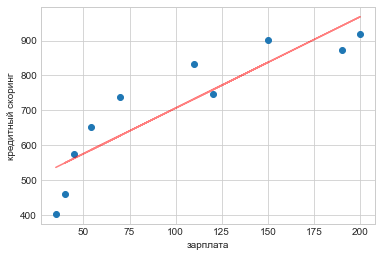

In [28]:
# Пункт 2
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
lx = salary
ly = b0 + b1 * lx

plt.scatter(salary, scoring)
plt.plot(lx, ly, color='red', alpha=0.5)

plt.xlabel('зарплата')
plt.ylabel('кредитный скоринг');

In [33]:
# Пункт 3. Посчитайте коэффициент детерминации.
from sklearn.metrics import r2_score
r2 = r2_score(scoring, ly)
r2

0.7876386635293686

In [43]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()
r21 = 1 - ((scoring - ly)**2).sum() / sum_of_squares(scoring)
r21

0.7876386635293686

In [44]:
# Пункт 4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
FishCrit(r2, m=1, n=salary.shape[0])

Крит. обл. - 5.317655071578714, статистика - 29.67164085966451
Уравнение регрессии признается значимым


Пункт 5. (доп) Посчитать среднюю ошибку аппроксимации
$$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$$

Если $\overline{A}$ не превышает $8-10 \%$, можно сказать, что теоретические значения близки к тем, которые выдает модель линейной регрессии.

In [47]:
np.abs((scoring - ly)/scoring).sum()/salary.shape[0]

0.11469251843561709